In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,f'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,f'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,f'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,f'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()

In [2]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=2
epochs=2
dataset_size=1000 #10800000 #1000000
model_name="point_net"
simulation_name=f"alpha_s_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size_gridexpress_balanced_datatset_test"

config=Config(simulation_name=simulation_name)
config.__str__()

2024-10-17 18:47:01.796838: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 18:47:01.804468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 18:47:01.813174: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 18:47:01.815705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 18:47:01.823077: I tensorflow/core/platform/cpu_feature_guar

Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test created.


2024-10-17 18:47:02.896114: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


'Project Root: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source\nData Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data\nModels Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models\nReports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports\nFigures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures\nSimulation Models Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nSimulation Reports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nSimulation Figures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nEnvironment Details:\n  T

In [3]:
from IPython.display import display
# with tf.device("CPU"):
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(dataset_size)
y_classes=y_df.columns
y=y_df.values
display("y_classes: ",y_classes)
display("y: ",y[:5])
display("y_raw: ",y_raw[:5])

Dataset Preprocessor
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


'y_classes: '

Index(['0.2', '0.3', '0.4'], dtype='object')

'y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'y_raw: '

array(['0.2', '0.2', '0.2', '0.2', '0.2'], dtype='<U32')

In [4]:
import tensorflow as tf
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_pointnet
with tf.device("CPU"):
    x_processed, y_processed=preprocess_dataset_for_pointnet(x,y)

'x.shape (1000, 32, 32, 1)'

'y.shape (1000, 3)'

'Data is normalized: True'

x_points: <class 'numpy.ndarray'> 3072000 (1000, 1024, 3)
y: <class 'numpy.ndarray'> 3000 (1000, 3)


Fold #1


'train_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'val_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'input_tensor: (1024, 3)'

'output_shape: 3'

Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3486 - loss: 1012.6368
Epoch 1: val_accuracy improved from -inf to 0.36000, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test/pointnet_fold_1_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3453 - loss: 994.4585 - val_accuracy: 0.3600 - val_loss: 688.8041 - learning_rate: 0.0010
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3801 - loss: 703.4401
Epoch 2: val_accuracy did not improve from 0.36000
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3681 - loss: 693.1738 - val_accuracy: 0.3360 - val_loss: 598.8796 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:23
batch_index: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
batch_index: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
batch_index: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
batch_index: 4
4

2024-10-17 18:47:33.450096: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


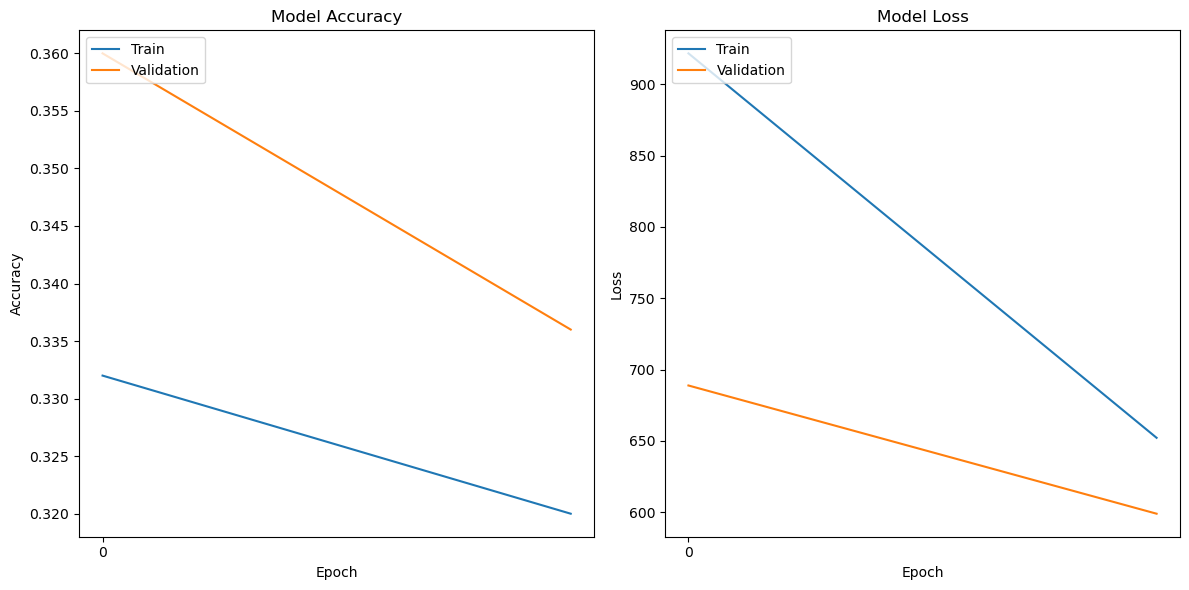

stored all splits' history in training_stats.csv


'out_of_sample_y.shape: '

(500, 3)

'out_of_sample_y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'out_of_sample_compare.shape: '

(500,)

'out_of_sample_compare'

array([0, 0, 0, 0, 0])

Fold #2


'train_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'val_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'input_tensor: (1024, 3)'

'output_shape: 3'

Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3805 - loss: 1035.2294
Epoch 1: val_accuracy improved from -inf to 0.33400, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test/pointnet_fold_2_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3716 - loss: 1018.7947 - val_accuracy: 0.3340 - val_loss: 6663726.0000 - learning_rate: 0.0010
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3505 - loss: 754.5240
Epoch 2: val_accuracy did not improve from 0.33400
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3436 - loss: 742.7422 - val_accuracy: 0.3340 - val_loss: 2834880.7500 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:23
batch_index: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
batch_index: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
batch_index: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
batch_i

2024-10-17 18:47:59.157711: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [5]:
if folds !=1:
    from jet_ml.dataset import create_tf_dataset
    from jet_ml.models.pointnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.pointnet import train_model
    from jet_ml.evaluation import get_accuracy

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=True,random_state=42)
    
    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):
        fold+=1
        print(f"Fold #{fold}")

        batch_size=128

        x_train=x_processed[train]
        y_train=y_processed[train]

        train_dataset = create_tf_dataset(x_train, y_train,batch_size=batch_size)
        display(f"train_dataset: {train_dataset}")

        x_test=x_processed[test]
        y_test=y_processed[test]

        val_dataset = create_tf_dataset(x_test, y_test,batch_size=batch_size)
        display(f"val_dataset: {val_dataset}")
        
        input_tensor=x_train[1].shape
        # input_tensor = np.expand_dims(x_train[1], axis=0)
        display(f"input_tensor: {input_tensor}")

        output_shape=y.shape[1]
        display(f"output_shape: {output_shape}")
        activation='softmax'

        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(num_classes=output_shape,activation=activation)
            # model.summary()

            model=compile_model(model)

            
            monitor='val_accuracy' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_dataset=train_dataset,val_dataset=val_dataset,
                                                                epochs=epochs,batch_size=batch_size,monitor=monitor,
                                                                fold=fold)
            from jet_ml.evaluation import get_accuracy_from_generator
            pred, score=get_accuracy_from_generator(model=model, data_generator=val_dataset)
            print("Accuracy:", score)
            folds_accuracy.append(score)
            times_taken.append(elapsed_time)    
            epochs_needed.append(epochs)

            
            out_of_sample_y.append(y_test)
            out_of_sample_pred.append(pred)
        #     print(f"Fold score (accuracy): {score}")

        #     from jet_ml.evaluation import save_training_history
        #     save_training_history(history=history,fold=fold)

        #     from jet_ml.evaluation import plot_training_history
        #     plot_training_history(history=history,fold=fold)

        # from jet_ml.evaluation import save_training_stats
        # save_training_stats(accuracies=folds_accuracy,
        #                     epochs_needed=epochs_needed,
        #                     times_taken=times_taken)

        # # Build the oos prediction list and calculate the error.
        # out_of_sample_y=np.concatenate(out_of_sample_y)
        # display("out_of_sample_y.shape: ", out_of_sample_y.shape)
        # display("out_of_sample_y: ",out_of_sample_y[:5])

        # out_of_sample_pred=np.concatenate(out_of_sample_pred)

        # # convert the out_of_sample_y to a 1D array
        # out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
        # display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
        # display("out_of_sample_compare" ,out_of_sample_y_compare[:5])



In [4]:
import tensorflow as tf
with tf.device("CPU"):
    from jet_ml.models.pointnet import preprocess_dataset
    (x_train,  y_train,x_test,  y_test)=preprocess_dataset(x, y_raw,is_one_hot_encoded=True)
    print("deleting original dataset")
    del x,y_raw

Pre-processing
dataset_x_points shape: (1000, 1024, 3)
deleting the original dataset after splitting ...
train_points: <class 'numpy.ndarray'> 2457600 (800, 1024, 3)
train_y: <class 'numpy.ndarray'> 800 (800,)
x_test_points: <class 'numpy.ndarray'> 614400 (200, 1024, 3)
y_test: <class 'numpy.ndarray'> 200 (200,)
y_test[:10]:
 ['0.3' '0.4' '0.3' '0.3' '0.2' '0.3' '0.3' '0.4' '0.2' '0.2']
Preprocess y_train and y_test
One-hot encode the categorical variable
y_test_categorical:
 [['0.3']
 ['0.4']
 ['0.3']
 ['0.3']
 ['0.2']
 ['0.3']
 ['0.3']
 ['0.4']
 ['0.2']
 ['0.2']]
y_test_categorical_encoded:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
deleting original dataset


In [5]:
with tf.device("CPU"):
    from jet_ml.models.pointnet import create_tf_dataset
    print("converting to tensor data")
    # Create TensorFlow Dataset for training data and test data
    dataset = create_tf_dataset(x_train, y_train)
    test_dataset = create_tf_dataset(x_test, y_test)
    len_x_train=len(x_train)
    len_x_test=len(x_test)
    print("deleting preprocessed dataset")
    del x_train,y_train,x_test,y_test

converting to tensor data
deleting preprocessed dataset


In [6]:
from jet_ml.models.pointnet import prepare_datasets
from jet_ml.models.pointnet import augment

with tf.device("CPU"):
    # Prepare datasets for training
    print("going to prepare dataset")
    train_dataset, validation_dataset,test_dataset = prepare_datasets(dataset, test_dataset, len_x_train, len_x_test, augment,train_size=1)
    print("deleting initial tensor dataset")
    del dataset

going to prepare dataset
deleting initial tensor dataset


In [7]:
with tf.device("CPU"):
    print(len(test_dataset))
    print(len(validation_dataset))

7
7


In [8]:
from jet_ml.models.pointnet import build_pointnet_classifier_model

NUM_POINTS = 1024
#because alpha_s can get 3 values
NUM_CLASSES = 3
activation="softmax"
# activation="sigmoid"

pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)


In [9]:
from jet_ml.models.pointnet import compile_pointnet_classifier_model_with_hyperparam
from jet_ml.models.pointnet import print_model_summary
learning_rate=0.001
# loss='sparse_categorical_crossentropy'
loss='categorical_crossentropy',

# metrics='sparse_categorical_accuracy'
metrics=['accuracy']

pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics)
# print_model_summary(pointnet)

In [10]:
best_model_path=f"{config.SIMULATION_MODELS_DIR}/best_model.keras"
display(best_model_path)

'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_1_fold_3_epoch_1k_dataset_size_hmsrv1_balanced_daatset_test/best_model.keras'

In [11]:
# Display the shape of the training data
train_data_shape = list(train_dataset.as_numpy_iterator())[0][0].shape
print("Train data shape:", train_data_shape)

# Display the first 5 entries of the training data
train_data_first_5 = list(train_dataset.as_numpy_iterator())[:5]
print("First 5 entries of the training data:")
for i, (data, label) in enumerate(train_data_first_5):
    print(f"Entry {i+1}:")
    print("Data:", data)
    print("Label:", label)

Train data shape: (32, 1024, 3)
First 5 entries of the training data:
Entry 1:
Data: [[[ 9.00381565e+00  8.00258862e+00 -7.29390916e-04]
  [ 5.99765864e+00  5.99803228e+00 -3.62357621e-03]
  [ 2.20024972e+01  1.30000135e+01 -2.67451520e-03]
  ...
  [ 3.99958868e+00  8.00487732e+00 -3.09704162e-03]
  [ 2.09980280e+01  3.09957168e+01 -4.22259652e-03]
  [ 2.59963355e+01  6.99528018e+00  2.09191495e-03]]

 [[-2.19959209e-03  1.79960214e+01 -1.91311461e-03]
  [ 1.00087747e+00  4.99991849e+00 -4.00988619e-04]
  [ 2.30035134e+01  3.00395589e+00  3.70187151e-04]
  ...
  [ 2.99978153e+01  1.29960584e+01 -4.28860957e-03]
  [ 1.99960637e+01  5.00257495e+00  4.36246410e-03]
  [ 4.99831177e+00  1.49987661e+01 -4.18762883e-03]]

 [[ 6.99725377e+00  2.13372192e-03  4.92738263e-03]
  [ 2.49979321e+01  3.00375767e+00 -4.97926352e-03]
  [ 4.00001186e+00  3.10014788e+01  1.28877676e-03]
  ...
  [ 8.99870660e+00  2.20004854e+01  3.58881372e-03]
  [ 1.10034583e+01  2.20001096e+01  4.66395522e-03]
  [ 1.002

2024-10-14 18:18:08.435086: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-10-14 18:18:08.488149: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# Extract the 'y' side of the train_dataset
train_labels = [label for _, label in train_dataset]

# Display the first 5 entries of the 'y' side
train_labels_first_5 = train_labels[:5]
print("First 5 entries of the 'y' side of the train_dataset:")
for i, label in enumerate(train_labels_first_5):
    print(f"Entry {i+1}: {label}")

First 5 entries of the 'y' side of the train_dataset:
Entry 1: [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Entry 2: [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Entry 3: [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 

In [14]:
epochs=1000

In [15]:
# %%timeit -n1 -r1
from jet_ml.models.pointnet import train_model_with_callbacks

# monitor = 'val_sparse_categorical_accuracy'
monitor = 'val_accuracy'
with tf.device('/GPU:0'):
  model, history, train_time = train_model_with_callbacks(
    pointnet, 
    train_dataset=train_dataset, 
    validation_dataset=validation_dataset,
    monitor=monitor, 
    best_model_file_path=best_model_path, 
    n_epochs=epochs
  )
  

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.3146 - loss: 38.1820
Epoch 1: val_accuracy improved from -inf to 0.35000, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_1_fold_3_epoch_1k_dataset_size_hmsrv1_balanced_daatset_test/best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.3159 - loss: 38.1144 - val_accuracy: 0.3500 - val_loss: 52984.1445
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.3347 - loss: 34.8606
Epoch 2: val_accuracy improved from 0.35000 to 0.36500, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_1_fold_3_epoch_1k_dataset_size_hmsrv1_balanced_daatset_test/best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.3344 - loss: 34.8595 - val_accuracy: 0.3650 - val_loss: 486.1537
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.3502 - loss: 34.8113
Epoch 3: val_accuracy did 

In [4]:
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_pointnet

WIDTH = 256
HEIGHT = 256
import tensorflow as tf
with tf.device("/CPU:0"):
    x_resized,y_resized= preprocess_dataset_for_resnet(x,y,WIDTH,HEIGHT)

I0000 00:00:1727368895.207278  191207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727368895.207413  191207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727368895.207461  191207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727368895.248224  191207 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

'x.shape (1000, 32, 32, 1)'

d negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727368895.248447  191207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 12:41:35.248504: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6270 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


'y.shape (1000, 3)'

'Data is normalized: True'

'x_rgb.shape (1000, 32, 32, 3)'

'x_resized.shape (1000, 256, 256, 3)'

'y_resized.shape (1000, 3, 1)'

In [ ]:
if folds==1:
    Display("Folds: ",folds)
    TRAIN_PCT = 0.9
    TRAIN_CUT = int(len(x) * TRAIN_PCT)

    x_df_train_cut = x_resized[0:TRAIN_CUT]
    x_df_validate_cut = x_resized[TRAIN_CUT:]

    y_df_train_cut = y_resized[0:TRAIN_CUT]
    y_df_validate_cut = y_resized[TRAIN_CUT:]


    print(f"Training size: {len(x_df_train_cut)}")
    print(f"Validate size: {len(x_df_validate_cut)}")
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    # Usage
    train_generator = create_train_data_generator(x_df_train_cut, y_df_train_cut)
    val_generator = create_validation_data_generator(x_df_validate_cut, y_df_validate_cut)
    display("train_generator_x: ",train_generator.__next__()[0].shape)
    display("train_generator_y: ",train_generator.__next__()[1].shape)
    display("val_generator_x: ",val_generator.__next__()[0].shape)
    display("val_generator_y: ",val_generator.__next__()[1].shape)
    from jet_ml.models.resnet import build_model

    with tf.device('/GPU:0'):#/GPU:0
        import tensorflow as tf
        # Enable logging of device placement
        tf.debugging.set_log_device_placement(True)
        
        from tensorflow.keras.layers import Input
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        model=build_model(input_tensor,num_classes=3,activation='softmax')
        # model.summary()
        import tensorflow as tf

        from jet_ml.models.helpers import compile_model
        model=compile_model(model)
    # model.summary()

    from jet_ml.models.resnet import train_model
    monitor='val_loss' #'val_accuracy' or 'val_loss'
    import tensorflow as tf
    with tf.device('/GPU:0'):#/GPU:0
        train_model(model,train_generator,val_generator,epochs=epochs,monitor=monitor)
    from jet_ml.evaluation import get_accuracy
    predictions, accuracy = get_accuracy(model=model, data_generator=val_generator)  # or use train_generator

    print("Predicted classes:", predictions)
    print("Accuracy:", accuracy)



Fold #1
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727368916.964084  191316 service.cc:146] XLA service 0x7d442c0017e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727368916.964106  191316 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-09-26 12:41:57.371267: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-26 12:41:58.888741: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8

 1/25 ━━━━━━━━━━━━━━━━━━━━ 12:04 30s/step - accuracy: 0.3646 - loss: 1.2390

I0000 00:00:1727368935.542056  191316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3349 - loss: 2.2444
Epoch 1: val_loss improved from inf to 1.59899, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_1_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 264ms/step - accuracy: 0.3358 - loss: 2.2196 - val_accuracy: 0.6667 - val_loss: 1.5990 - learning_rate: 0.0010
Epoch 2/2


2024-09-26 12:42:22.036489: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-26 12:42:22.036716: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-09-26 12:42:22.616094: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1699', 8 bytes spill stores, 8 bytes spill loads




Epoch 2: val_loss improved from 1.59899 to 1.58513, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_1_model.keras


2024-09-26 12:42:23.771786: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 1.5851 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Elpased time: 0:00:39
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.335
Fold score (accuracy): 0.335
training_history_fold_1.csv


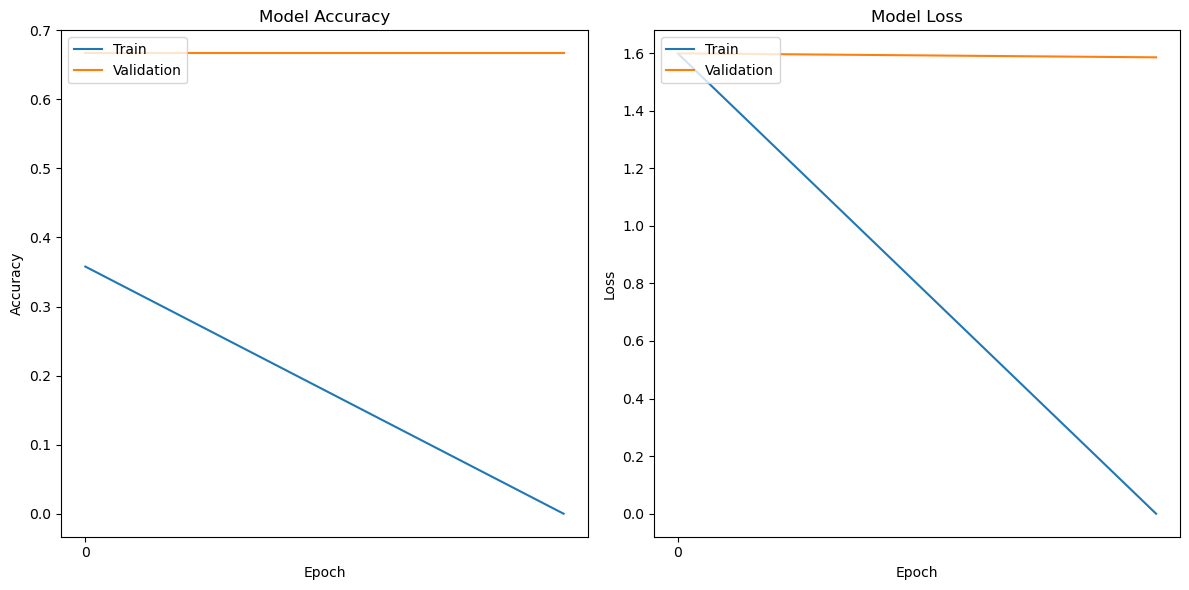

Fold #2
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3364 - loss: 2.2363
Epoch 1: val_loss improved from inf to 1.90353, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_2_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 252ms/step - accuracy: 0.3365 - loss: 2.2137 - val_accuracy: 0.6667 - val_loss: 1.9035 - learning_rate: 0.0010
Epoch 2/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.90353 to 0.95416, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_2_model.keras


2024-09-26 12:42:56.975390: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-26 12:42:56.975426: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3258927024734147641
2024-09-26 12:42:56.975437: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15584129597663863916


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.9542 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Elpased time: 0:00:28
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.33
Fold score (accuracy): 0.33
training_history_fold_2.csv


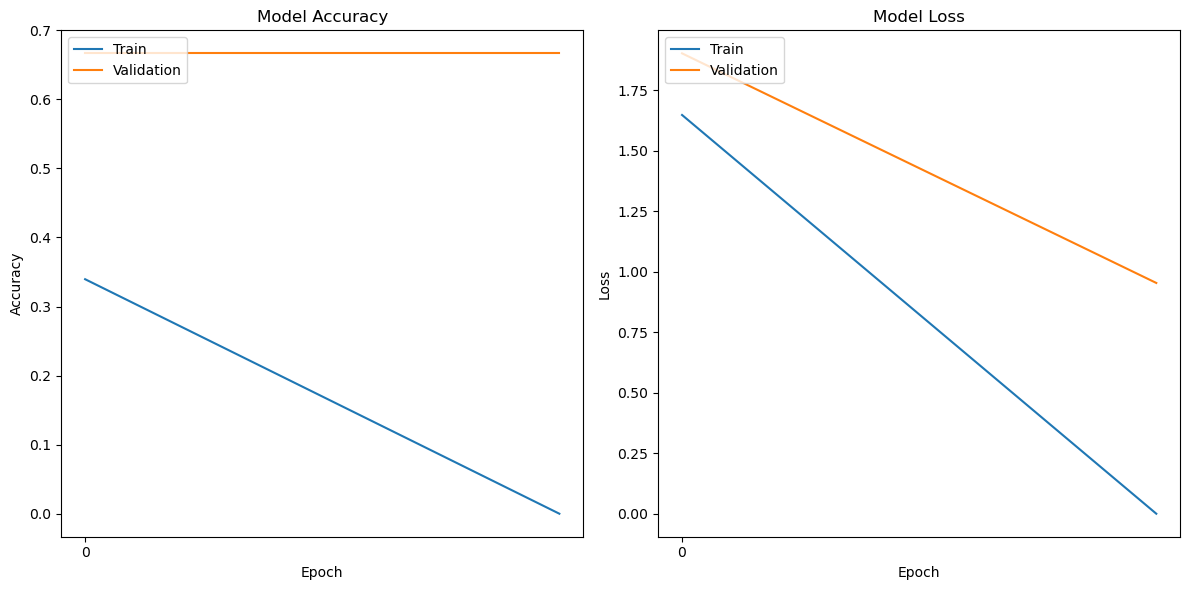

Fold #3
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3212 - loss: 2.3701
Epoch 1: val_loss improved from inf to 1.13648, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_3_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.3216 - loss: 2.3453 - val_accuracy: 0.0000e+00 - val_loss: 1.1365 - learning_rate: 0.0010
Epoch 2/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.13648 to 1.12631, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_3_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.1263 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Elpased time: 0:00:29
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.33
Fold score (accuracy): 0.33
training_history_fold_3.csv


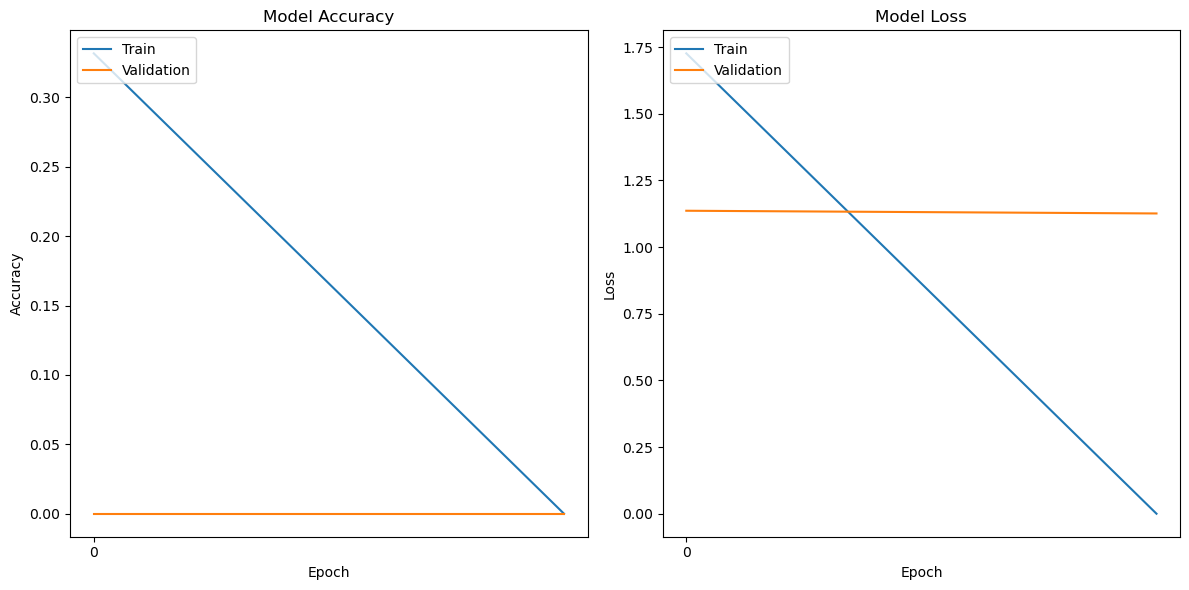

Fold #4
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3474 - loss: 2.0532
Epoch 1: val_loss improved from inf to 1.24390, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_4_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.3473 - loss: 2.0343 - val_accuracy: 0.0000e+00 - val_loss: 1.2439 - learning_rate: 0.0010
Epoch 2/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 1.24390
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.4974 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.


2024-09-26 12:44:04.124480: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-26 12:44:04.124528: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3258927024734147641
2024-09-26 12:44:04.124555: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15584129597663863916


Elpased time: 0:00:27
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.33
Fold score (accuracy): 0.33
training_history_fold_4.csv


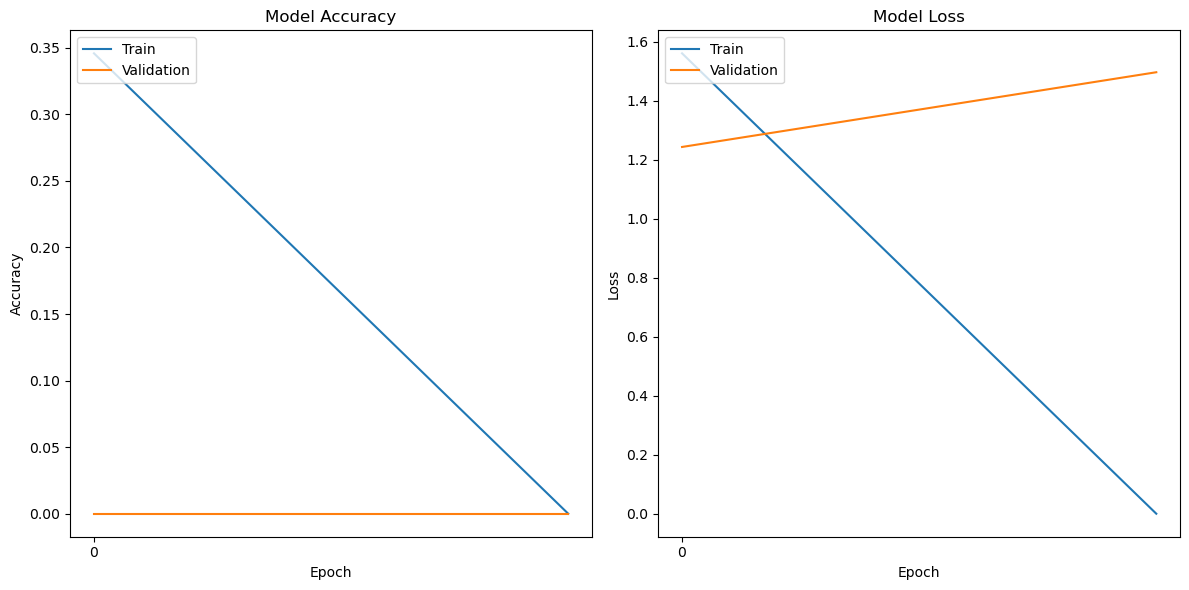

Fold #5
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3150 - loss: 2.1220
Epoch 1: val_loss improved from inf to 1.16593, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_5_fold_2_epoch_1k_dataset_size/ResNet50_fold_5_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 257ms/step - accuracy: 0.3162 - loss: 2.1018 - val_accuracy: 0.3333 - val_loss: 1.1659 - learning_rate: 0.0010
Epoch 2/2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 1.16593
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.1887 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:27
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy: 0.335
Fold score (accuracy): 0.335
training_history_fold_5.csv


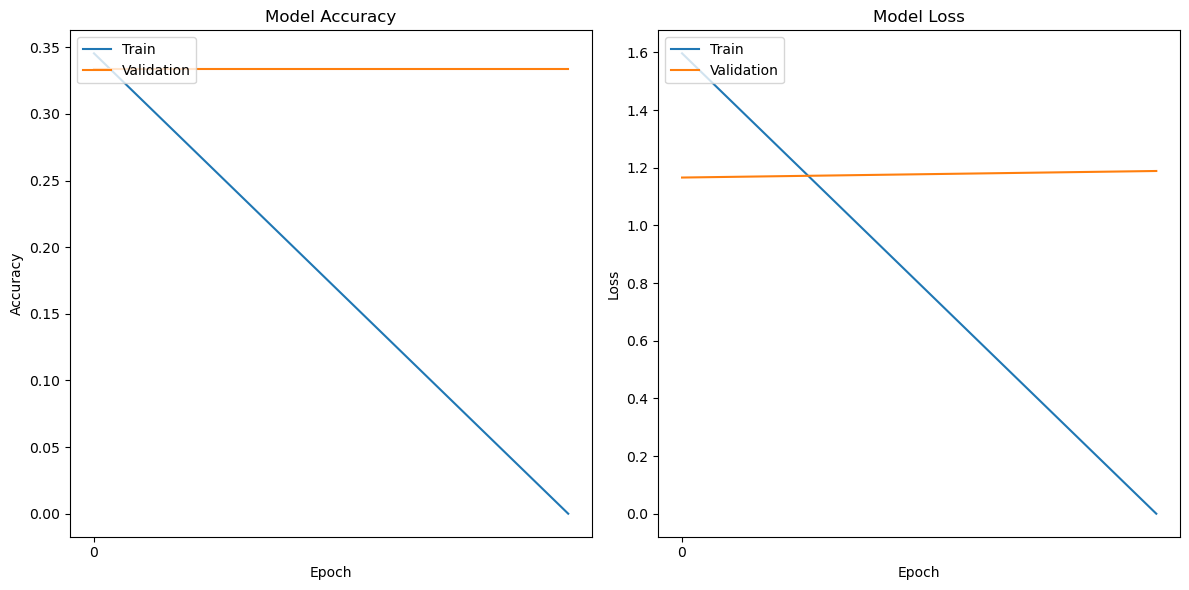

stored all splits' history in training_stats.csv


'out_of_sample_y.shape: '

(1000, 3, 1)

'out_of_sample_y: '

array([[[0],
        [0],
        [1]],

       [[0],
        [0],
        [1]],

       [[1],
        [0],
        [0]],

       [[0],
        [0],
        [1]],

       [[0],
        [0],
        [1]]])

'out_of_sample_compare.shape: '

(1000, 1)

'out_of_sample_compare'

array([[2],
       [2],
       [0],
       [2],
       [2]])

In [5]:
if folds !=1:
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    from jet_ml.models.resnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.resnet import train_model
    from jet_ml.evaluation import get_accuracy

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=False)

    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):
        fold+=1
        print(f"Fold #{fold}")

        x_train=x_resized[train]
        y_train=y_resized[train]
        train_generator = create_train_data_generator(x_train, y_train)
        # Get a batch of data
        x_batch, y_batch = next(train_generator)

        # Get the shape of y (labels) from the batch
        x_batch_shape = x_batch.shape

        print("Shape of y (labels) in the batch:", x_batch_shape)
        
        #log train_generator size
        # print(f"train_generator size: {len(train_generator)}")
        x_test=x_resized[test]
        y_test=y_resized[test]
        val_generator = create_validation_data_generator(x_test, y_test)

        # from jet_ml.models import resnet
        from tensorflow.keras.layers import Input
        
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        output_shape=y.shape[1]
        activation='softmax'
        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(input_tensor,num_classes=output_shape,activation=activation)
            # model.summary()
            import tensorflow as tf
            from jet_ml.models.helpers import compile_model
            model=compile_model(model)
            monitor='val_loss' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_generator,val_generator,
                                                                epochs=epochs,monitor=monitor,
                                                                fold=fold)

        from jet_ml.evaluation import get_accuracy
        pred, score=get_accuracy(model=model, data_generator=val_generator)
        print("Accuracy:", score)
        folds_accuracy.append(score)
        times_taken.append(elapsed_time)    
        epochs_needed.append(epochs)

        out_of_sample_y.append(y_test)
        out_of_sample_pred.append(pred)
        print(f"Fold score (accuracy): {score}")

        from jet_ml.evaluation import save_training_history
        save_training_history(history=history,fold=fold)

        from jet_ml.evaluation import plot_training_history
        plot_training_history(history=history,fold=fold)

    from jet_ml.evaluation import save_training_stats
    save_training_stats(accuracies=folds_accuracy,
                        epochs_needed=epochs_needed,
                        times_taken=times_taken)

    # Build the oos prediction list and calculate the error.
    out_of_sample_y=np.concatenate(out_of_sample_y)
    display("out_of_sample_y.shape: ", out_of_sample_y.shape)
    display("out_of_sample_y: ",out_of_sample_y[:5])

    out_of_sample_pred=np.concatenate(out_of_sample_pred)

    # convert the out_of_sample_y to a 1D array
    out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
    display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
    display("out_of_sample_compare" ,out_of_sample_y_compare[:5])


In [6]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.332

In [8]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
# convert out_of_sample_y from (1000, 3, 1) to (1000, 3)
out_of_sample_y_squeezed=np.squeeze(out_of_sample_y,axis=2)
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y_squeezed,out_of_sample_pred,y_classes)

Confusion matrix, without normalization
[[133  67 134]
 [133  67 134]
 [134  66 132]]
Normalized confusion matrix
[[0.4 0.2 0.4]
 [0.4 0.2 0.4]
 [0.4 0.2 0.4]]


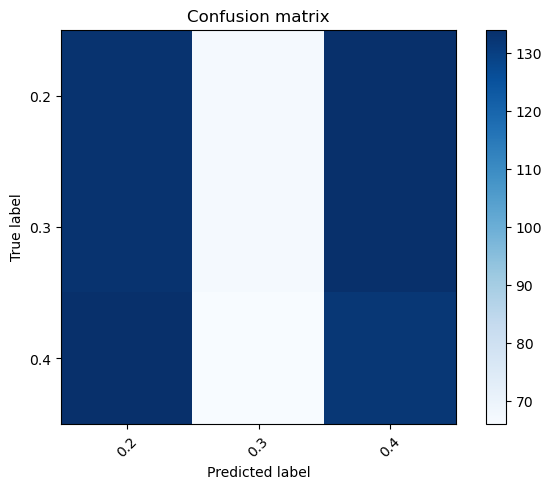

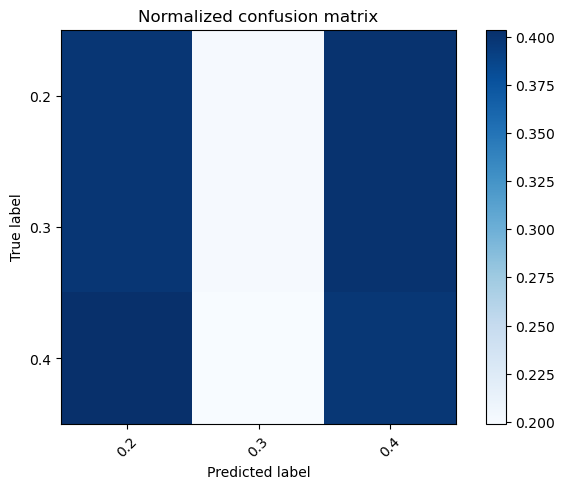

In [9]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)